Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [205]:
data= pd.read_csv("heart.csv")
df=data.copy()

# Ingest the data to notebook

In [206]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
88,54,0,2,110,214,0,1,158,0,1.600,1,0,2,1
117,56,1,3,120,193,0,0,162,0,1.900,1,0,3,1
75,55,0,1,135,250,0,0,161,0,1.400,1,0,2,1


# EDA

In [207]:
df.shape

(303, 14)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [209]:
df = df.astype({"sex": str, "cp": str,"fbs": str, "restecg":str, "exang":str,"slope":str, "thal":str, })

In [210]:
df = pd.get_dummies(df, drop_first= True )
# str cevirdigimi degerleri duymy yapiyorum


In [211]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [212]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040,0.729,0.545,0.683,0.165,0.287,0.076,0.149,0.502,0.013,0.327,0.462,0.469,0.059,0.548,0.386
std,9.082,17.538,51.831,22.905,1.161,1.023,0.499,0.466,0.372,0.453,0.265,0.356,0.501,0.114,0.470,0.499,0.500,0.237,0.499,0.488
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,120.000,211.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,130.000,240.000,153.000,0.800,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,140.000,274.500,166.000,1.600,1.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000
max,77.000,200.000,564.000,202.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [213]:
for i in df.drop(columns ="target"):
    print(f"corr between Target and {i:<12}:  {df['target'].corr(df[i])}")
    #butun columlarin targeta gore cor aliyoruz

corr between Target and age         :  -0.22543871587483752
corr between Target and trestbps    :  -0.14493112849775172
corr between Target and chol        :  -0.08523910513756915
corr between Target and thalach     :  0.4217409338106747
corr between Target and oldpeak     :  -0.4306960016873689
corr between Target and ca          :  -0.3917239923512525
corr between Target and sex_1       :  -0.28093657550176687
corr between Target and cp_1        :  0.24587909539147876
corr between Target and cp_2        :  0.31674215819553964
corr between Target and cp_3        :  0.08695687464637597
corr between Target and fbs_1       :  -0.028045760272712914
corr between Target and restecg_1   :  0.17532180367281452
corr between Target and restecg_2   :  -0.068410239517832
corr between Target and exang_1     :  -0.43675708335330315
corr between Target and slope_1     :  -0.3620532995588202
corr between Target and slope_2     :  0.3940663689190677
corr between Target and thal_1      :  -0.1065889738

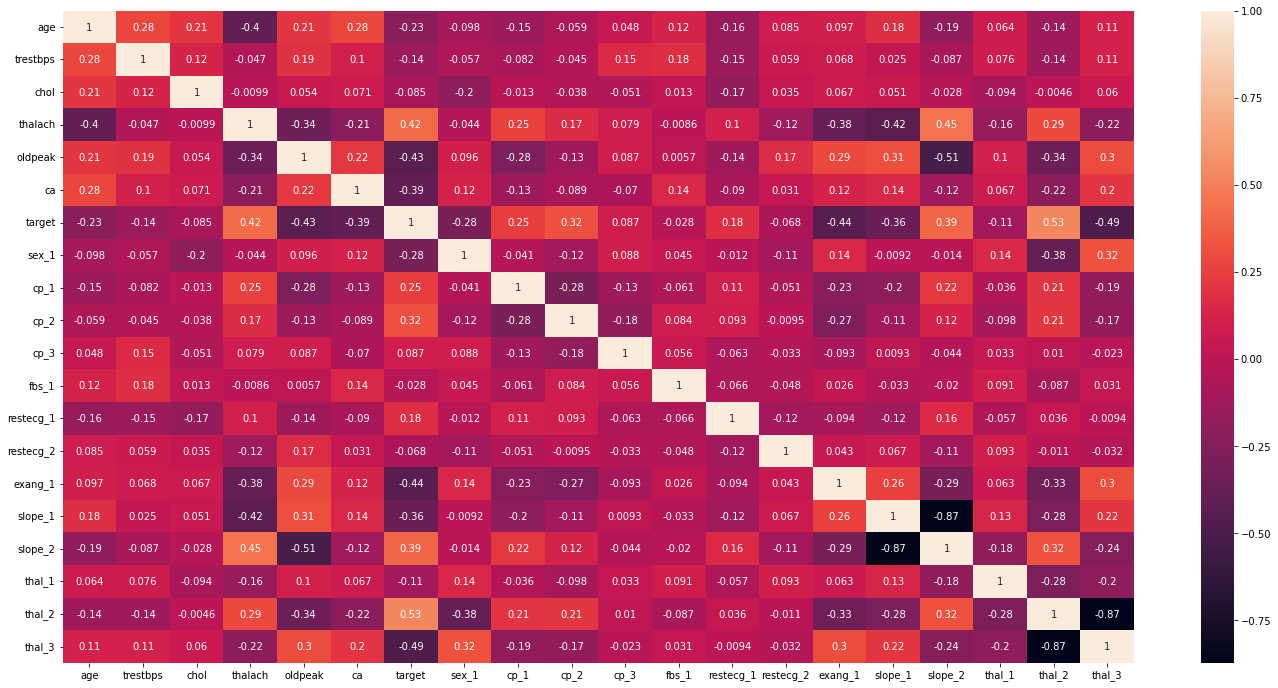

In [329]:
plt.figure(figsize=(24, 12))# ooooooo:) 
sns.heatmap(df.corr(), annot = True);


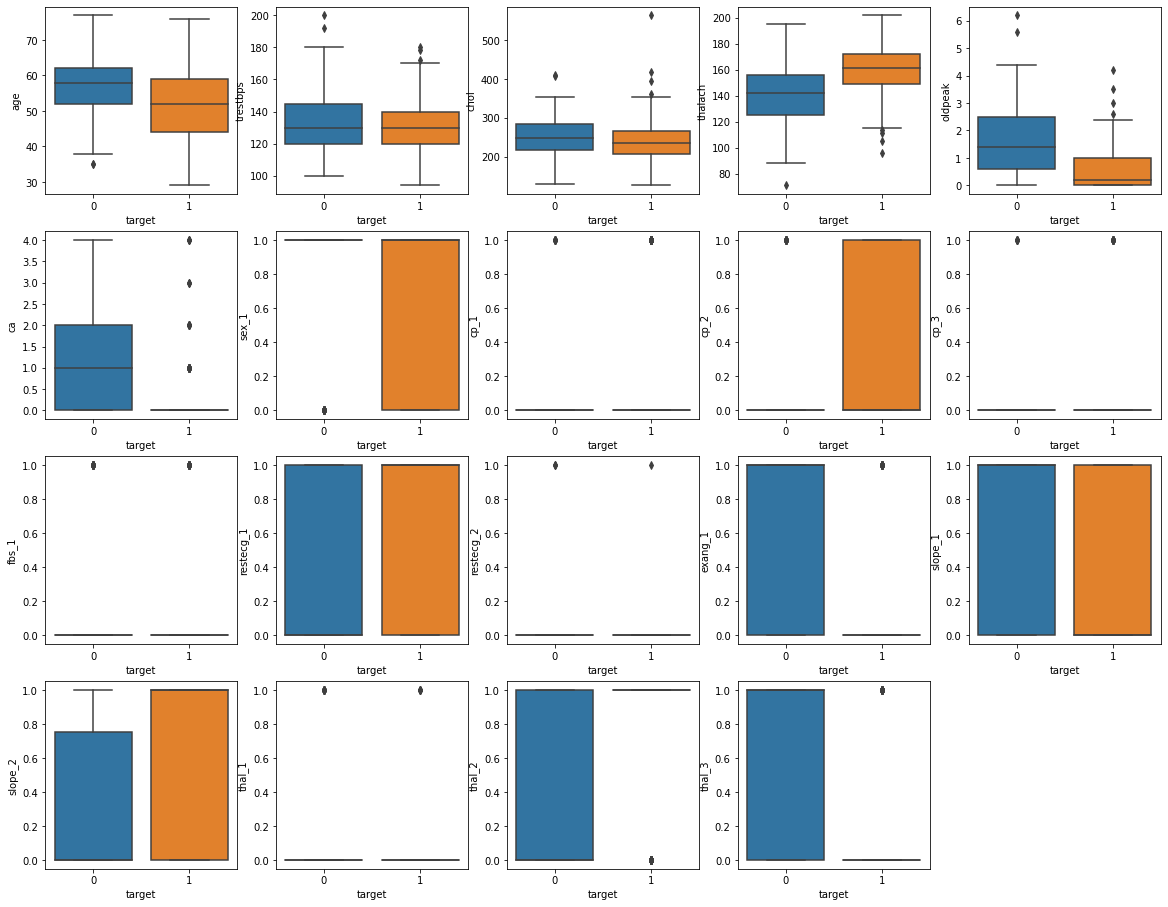

In [215]:
index = 0  # target valumuza gore featurelarin box plotunu aliyoruz
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "target":
        index += 1
        plt.subplot(5,5,index)
        sns.boxplot(x='target',y=feature,data=df)


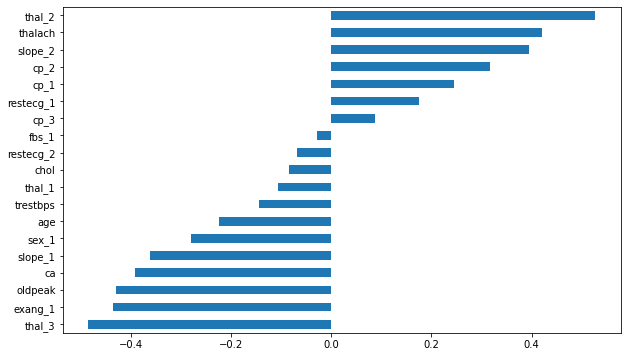

In [216]:
df.corr()["target"].drop("target").sort_values().plot.barh();
# target colum disndakileri cor larina baktik.
# mesela + anlamda encok thal_2 etkiliymis
# negetif anlamfa thal_3 etkiliymis

In [217]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [218]:
df_cont = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','ca', 'target']]
#cont lardan olusan bir df olurturduk 
# amaci describeda ,pair plot ...verlerde anlamli biseler ciksin diye
df_cont

,age,trestbps,chol,thalach,oldpeak,ca,target
0,63,145,233,150,2.300,0,1
1,37,130,250,187,3.500,0,1
2,41,130,204,172,1.400,0,1
3,56,120,236,178,0.800,0,1
4,57,120,354,163,0.600,0,1
...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0
299,45,110,264,132,1.200,0,0
300,68,144,193,141,3.400,2,0
301,57,130,131,115,1.200,1,0


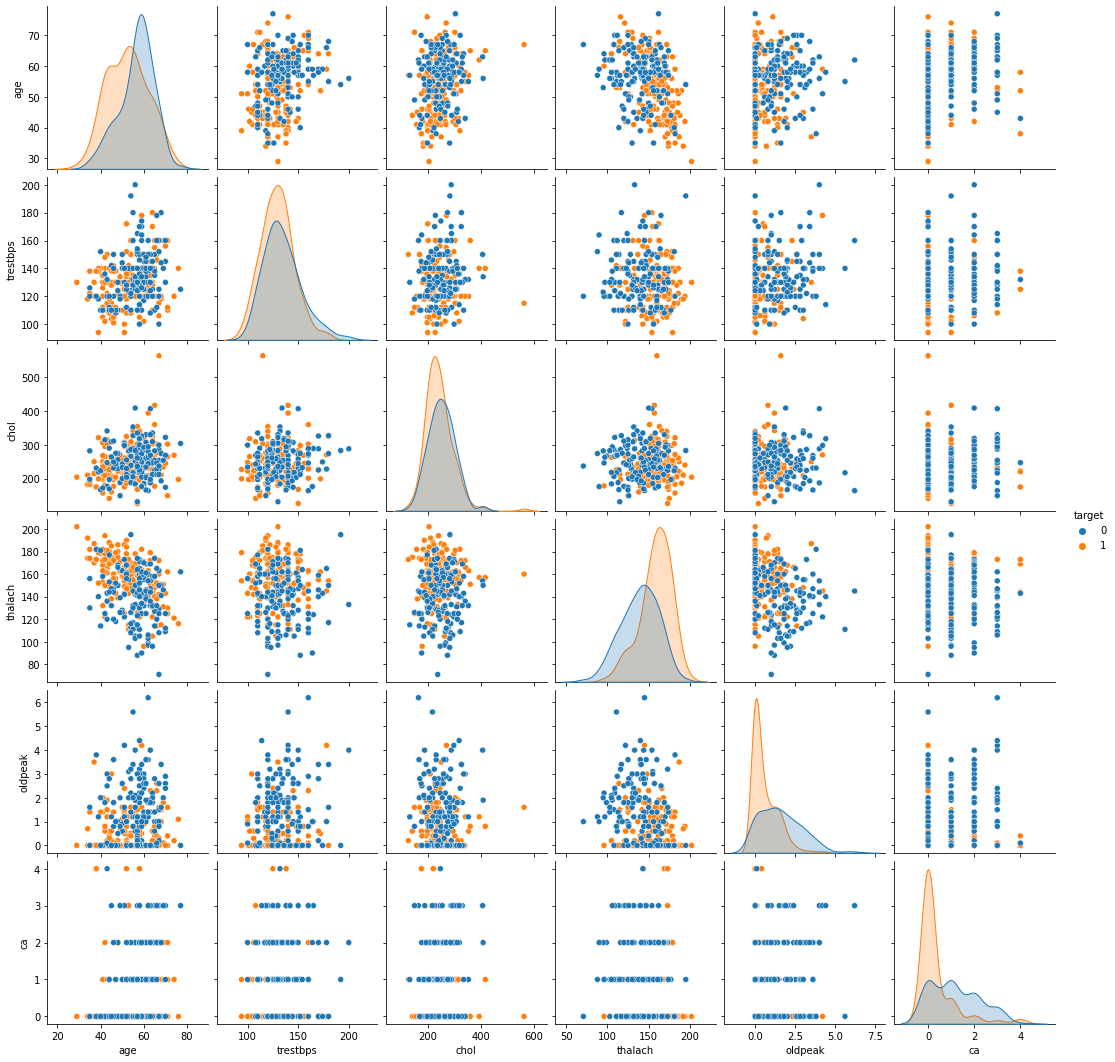

In [219]:
sns.pairplot(df_cont, hue = 'target');   


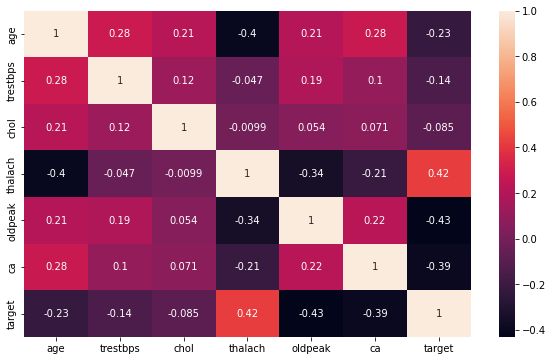

In [220]:
sns.heatmap(df_cont.corr(), annot = True);
#mesele  bak contlarin maplaeri daha anlami

In [221]:
df_get_dummy = df[['sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3', 'target']]
df_get_dummy
# dumy yaptigimiz string degerleri de gorelim onlar da eksik kalmasin :) 


,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target
0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,1,1,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,0,0,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,1,0,1,1,0,0,0,1,0
299,1,0,0,1,0,1,0,0,1,0,0,0,1,0
300,1,0,0,0,1,1,0,0,1,0,0,0,1,0
301,1,0,0,0,0,1,0,1,1,0,0,0,1,0


# Data Preprocessing

In [222]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.200,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
299,45,110,264,132,1.200,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
300,68,144,193,141,3.400,2,0,1,0,0,0,1,1,0,0,1,0,0,0,1
301,57,130,131,115,1.200,1,0,1,0,0,0,0,1,0,1,1,0,0,0,1


In [223]:
X=df.drop(["target"], axis=1)# ulsmak istedigimiz sey zaten target datamizdan cikariyoruz ki zatne onu tesbit etmye caliyoruz
# supervised calismak icin bu sart :)
y=df["target"]# burda y target ve feature diye ikiye ayiriken...

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
#datayi  parcalara boluyoruz burda ise egitim  ve test icin ytrain,xtrain,ytest,xtest 


In [226]:
scaler = StandardScaler()
# modeli anlamli bir sekilddee calistirmak ve yorumlamak icin ve kiyas yapabilmek icin verilerimi 
# ayni metrige cekiyorum,. satndarditasyon  normalizasyon ile yapiyorum


In [227]:
X_train

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
19,69,140,239,151,1.800,2,0,0,0,1,0,1,0,0,0,1,0,1,0
247,66,160,246,120,0.000,3,1,1,0,0,0,1,0,1,1,0,1,0,0
289,55,128,205,130,2.000,1,0,0,0,0,0,0,1,1,1,0,0,0,1
288,57,110,335,143,3.000,1,1,0,0,0,0,1,0,1,1,0,0,0,1
60,71,110,265,130,0.000,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,65,160,360,151,0.800,0,0,0,1,0,0,0,0,0,0,1,0,1,0
104,50,129,196,163,0.000,0,1,0,1,0,0,1,0,0,0,1,0,1,0
140,51,120,295,157,0.600,0,0,0,1,0,0,0,0,0,0,1,0,1,0
114,55,130,262,155,0.000,0,1,1,0,0,0,1,0,0,0,1,0,1,0


In [228]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train
#  egiytim datasini fit ve transform ediyoruz
# test datsini sadce donusturuyoruz yani transform ediyoruz 
# cunku test datasini ffit etmemizz data leakege dedigimiz verisizintiisina sebep olur
# asagidaki degerler (4 u neden uretti -1,06 neden uretti ???)


array([[ 1.61047991,  0.46184018, -0.12323542, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 1.28205058,  1.57559529,  0.02336627, ...,  4.03555625,
        -1.06845352, -0.82495791],
       [ 0.0778097 , -0.20641288, -0.83530077, ..., -0.24779731,
        -1.06845352,  1.21218305],
       ...,
       [-0.36009607, -0.65191492,  1.04957809, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 0.0778097 , -0.09503737,  0.35845584, ..., -0.24779731,
         0.93593215, -0.82495791],
       [ 1.0630977 ,  2.68935039,  1.67787105, ..., -0.24779731,
         0.93593215, -0.82495791]])

In [229]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[ 0.29676259,  1.01871774,  0.65165922, ...,  4.03555625,
        -1.06845352, -0.82495791],
       [ 1.39152703, -0.37347614,  0.19091106, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [-0.90747829,  0.46184018,  1.38466767, ..., -0.24779731,
        -1.06845352,  1.21218305],
       ...,
       [-0.03166674, -1.20879247, -0.12323542, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [ 0.40623903,  1.01871774,  0.52600063, ..., -0.24779731,
        -1.06845352,  1.21218305],
       [-0.57904896, -0.09503737,  0.44222824, ..., -0.24779731,
         0.93593215, -0.82495791]])

- Target valuemiz bizim loggistik regresyona uygun  yani ssiniflandirma fonk siyonu oldugu icin logistik regresyonn kullaniriz
- ama targetimiz var yok degil de continues deger uretilseydi lineer regresyon yapairdikkkkk

# Implement Logistic Regression and Evaluate

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
log_model=LogisticRegression()

In [232]:
log_model.fit(scaled_X_train, y_train) 
# burda modeli fit egitim   ediyoruz modele datayi ogretiyoruz 
#log modele gore scale ettigim datayi egit 


LogisticRegression()

In [233]:
df.shape

(303, 20)

In [234]:
log_model.coef_ #log modelin katsayilari  hangi feature targetima etkisi ne ....

array([[ 0.05112223, -0.15830979, -0.55019996,  0.33830234, -0.45297164,
        -0.53722558, -0.57453581,  0.42085699,  0.85652289,  0.50622193,
        -0.06374748,  0.26749763, -0.07263897, -0.41445368, -0.2149557 ,
         0.15885716,  0.02436584,  0.36190068, -0.47054727]])

In [235]:
log_model.intercept_ # bo yani kesisim noktammmm

array([0.19743871])

In [236]:
y_pred=log_model.predict(scaled_X_test)
y_pred 
# egitilen modelimizi test verimizi vererek modelimizin targeti tahmin etmesini istiyoruz 


array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [237]:
y_pred_proba = log_model.predict_proba(scaled_X_test)
y_pred_proba
# egitilen modelimizi test verimizi vererek modelimizin targeti tahmin etmesinin orani


array([[0.96179293, 0.03820707],
       [0.89192128, 0.10807872],
       [0.9931363 , 0.0068637 ],
       [0.1705224 , 0.8294776 ],
       [0.41717695, 0.58282305],
       [0.93539127, 0.06460873],
       [0.06566554, 0.93433446],
       [0.68125946, 0.31874054],
       [0.0122093 , 0.9877907 ],
       [0.55610944, 0.44389056],
       [0.89912833, 0.10087167],
       [0.39842961, 0.60157039],
       [0.94158555, 0.05841445],
       [0.02389499, 0.97610501],
       [0.01162699, 0.98837301],
       [0.13592212, 0.86407788],
       [0.0264357 , 0.9735643 ],
       [0.29603967, 0.70396033],
       [0.25360494, 0.74639506],
       [0.26230565, 0.73769435],
       [0.15298498, 0.84701502],
       [0.86195931, 0.13804069],
       [0.05796646, 0.94203354],
       [0.0797568 , 0.9202432 ],
       [0.0453204 , 0.9546796 ],
       [0.98059831, 0.01940169],
       [0.89075071, 0.10924929],
       [0.48004752, 0.51995248],
       [0.78553686, 0.21446314],
       [0.09476906, 0.90523094],
       [0.

In [238]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred 

test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)
# dataframeleri kiyas icin birlestirdik


,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred,pred_proba
188,50,140,233,163,0.600,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0.583
157,35,122,192,174,0.000,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0.970
281,52,128,204,156,1.000,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0.281
197,67,125,254,163,0.200,2,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0.108
297,59,164,176,90,1.000,2,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.076
95,53,142,226,111,0.000,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0.101
41,48,130,245,180,0.200,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0.831
133,41,110,235,153,0.000,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0.942
26,59,150,212,157,1.600,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,1,0.945
62,52,118,186,190,0.000,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0.952


# Model Performance

In [239]:
from sklearn.metrics import confusion_matrix, classification_report
#modelin performansini metriclerle olcuyoruz
#log modelinin en onemli performas mericleri confussion matrix ve classification yontemleridir..



In [240]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")# mesela asagidaki cofussion metrigi ytrain ile ytraiprede bakicak
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    #kendi metricleri tanimlayip onlarin nerelere bakicagini soyluyoruz


In [241]:
eval_metric(log_model, scaled_X_train, y_train,scaled_X_test, y_test)
# sonuclari aldik tahnim ile gercek deger arasindaki sonuclari belirledigimiz metrice gore aliyorz.


Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



- 21=TN kisi hasta degil bizde hasta olmadigini bilmisiz
- 7= FP ksi hasta degil ben hasta demisim 
- 3= FN  kisi hasta ben hasta degil demisim 
- 30 =TP ksi hasta bende hasta oldugunu bilmisim
- accuracy= 0.86 makinemizin dogruluk orani 
- precssion= makinamizin toplam TP/fp + Tp  sonuclarinin TP orani
- recall= makinamizin tp / TP+ FN dogru bildiklerimizn icinde ki TP oorani
- support 0 larin toplami 1 lerin toplami yani bizim toplam olaymiz
- indexdden dolayi yerler degisik dikkat


CONFUSION MATRIX :

In [242]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [243]:
confusion_matrix(y_test, y_pred)

array([[21,  7],
       [ 3, 30]])

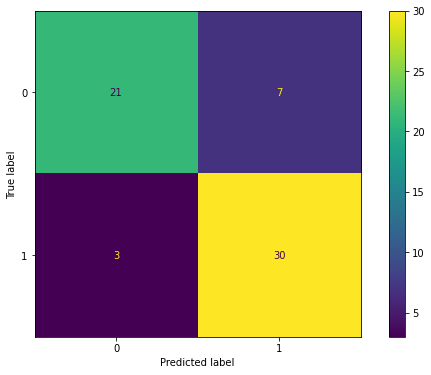

In [244]:
plot_confusion_matrix(log_model,scaled_X_test, y_test);

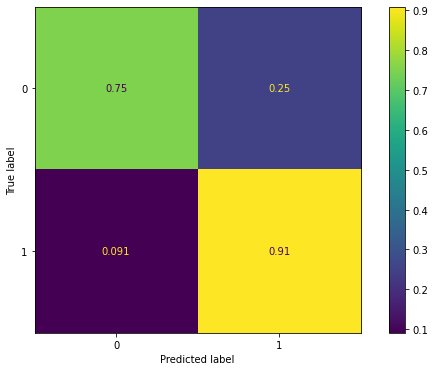

In [245]:
plot_confusion_matrix(log_model,scaled_X_test, y_test, normalize='true');  
#normalize true bu gercek degere gore makinanin matrix
# 

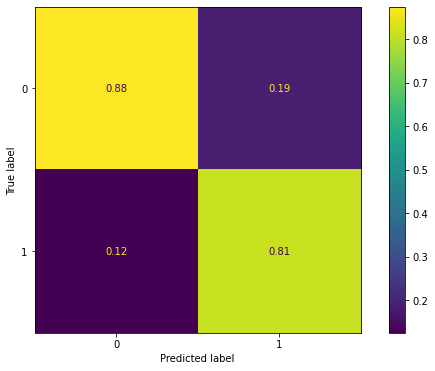

In [246]:
plot_confusion_matrix(log_model,scaled_X_test, y_test, normalize='pred');
#bu da tahmin degerine gore orani

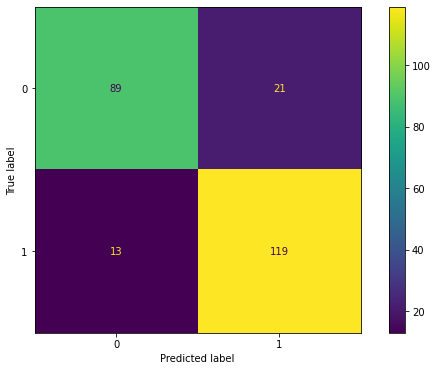

In [247]:
plot_confusion_matrix(log_model,scaled_X_train, y_train);

# Cross Validate

In [248]:
from sklearn.model_selection import cross_validate
# log modelim icin cross vali yapiyorum butun modeli tariyrum. 


In [249]:
model = LogisticRegression()# yeni modelde islem yaptiriyor

scores = cross_validate(model, scaled_X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))# 4 score gore modelimi olc bic
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.005,0.002,0.857,0.857,0.857,0.840
2,0.003,0.002,0.800,0.857,0.828,0.800
3,0.004,0.002,0.786,0.846,0.815,0.792
4,0.003,0.002,0.800,0.923,0.857,0.833
5,0.003,0.002,0.923,0.923,0.923,0.917
6,0.003,0.002,0.714,0.769,0.741,0.708
7,0.003,0.002,0.857,0.923,0.889,0.875
8,0.003,0.002,0.917,0.846,0.880,0.875
9,0.003,0.002,0.917,0.846,0.880,0.875
10,0.003,0.002,0.812,1.000,0.897,0.875


In [250]:
df_scores.mean()[2:]


test_precision   0.838
test_recall      0.879
test_f1          0.857
test_accuracy    0.839
dtype: float64

In [251]:
eval_metric(log_model, scaled_X_train, y_train, scaled_X_test, y_test)

Test_Set
[[21  7]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61


Train_Set
[[ 89  21]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       110
           1       0.85      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



- Grip search ile once modelin optimal hyper parametreleri bulup modeli optimal ediyorum

# GridSearch for Logistic Regression:

In [252]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall", 
                          n_jobs = -1)

In [253]:
grid_model.fit(scaled_X_train,y_train)

/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/emine/Library/Python/3.9/lib/pyth

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([     0.1       ,      0.20691381,      0.42813324,      0.88586679,
            1.83298071,      3.79269019,      7.8475997 ,     16.23776739,
           33.59818286,     69.51927962,    143.84498883,    297.63514416,
          615.84821107,   1274.2749857 ,   2636.65089873,   5455.59478117,
        11288.37891685,  23357.2146909 ,  48329.30238572, 100000.        ]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [254]:
grid_model.best_params_


{'C': 0.42813323987193935,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [255]:
eval_metric(grid_model, scaled_X_train, y_train, scaled_X_test, y_test)

Test_Set
[[20  8]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Train_Set
[[ 90  20]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       110
           1       0.86      0.90      0.88       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



_ bizim modelimize uygiladigimi optimal hyper parametreleri modelimizin dogruluk payini gorsellestirmeye calisiyoruz

# ROC/AUC for Logistic Regression:

In [256]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

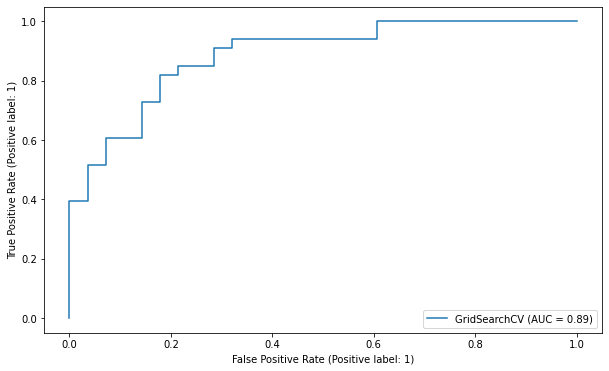

In [257]:
plot_roc_curve(grid_model, scaled_X_test, y_test);

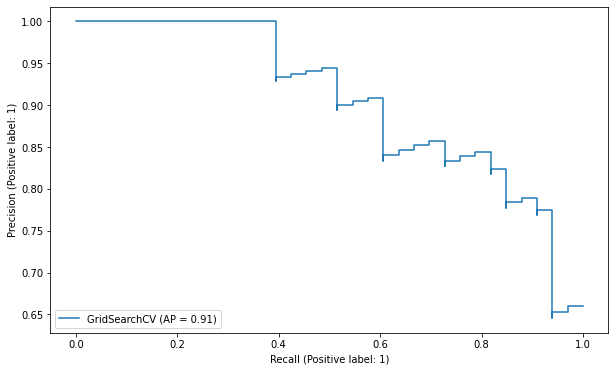

In [258]:
plot_precision_recall_curve(grid_model,scaled_X_test, y_test);


#trasehold belli oran altinda ki bizim modelimiz esigi belli esikden sonra sunu yapsin  belli esikden sonra 1 yapsin gibi

# Best Treshold for Logistic Regression:

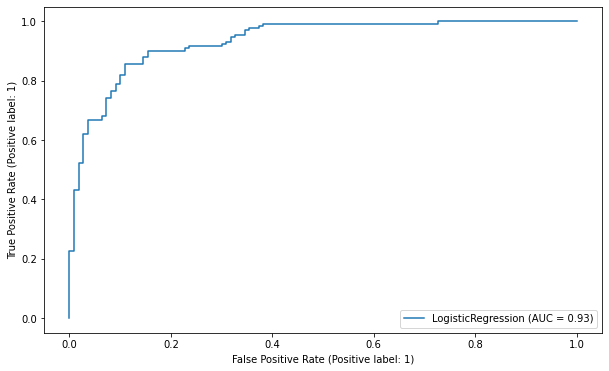

In [259]:
plot_roc_curve(log_model, scaled_X_train, y_train);

In [260]:
y_pred_proba = log_model.predict_proba(scaled_X_train) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.934297520661157

- diger bir siniflandirma modeli , kucuk modellerde , en yakin komsuya bakarak karar veririz veriyi siniflandiriiz
- bunu yaparken 2 yontem en cok kullnilir , manhattan ve eucledion

# Implement KNN and Evaluate

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [262]:
X = df.drop('target',axis=1) # yine targeti ayirdik supervised oldugu icin
y = df['target']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [264]:
scaler = StandardScaler()

In [265]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [266]:
from sklearn.neighbors import KNeighborsClassifier

In [267]:
knn_model = KNeighborsClassifier(n_neighbors=5) 


In [268]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [269]:
y_pred = knn_model.predict(scaled_X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0])

In [270]:
y_pred_proba = knn_model.predict_proba(scaled_X_test)# benim kkn modelimin secim olasiklari

In [271]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.600,0.400
1,0.400,0.600
2,0.200,0.800
3,1.000,0.000
4,0.000,1.000
...,...,...
86,1.000,0.000
87,0.400,0.600
88,0.400,0.600
89,0.800,0.200


In [272]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
# dict olusturduk bizim gercek deger tahmin ettigi deger ve olasikliklari ayni anda goredcegi bir data frame olustirmak icn yaptik

In [273]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
5,1,0,0.400,0.600
242,0,0,0.400,0.600
144,1,0,0.400,0.600
109,1,1,0.800,0.200
90,1,1,1.000,0.000
139,1,0,0.000,1.000
192,0,0,0.200,0.800
116,1,1,0.800,0.200
231,0,0,0.000,1.000
22,1,1,0.800,0.200


# yukarda LOg modeli iicn yaptigimiz islemleri KNN modeli icinde yaoiyoruz 

# Visually compare models based on your chosen metric

In [274]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


In [275]:
confusion_matrix(y_test, y_pred)

array([[33,  8],
       [12, 38]])

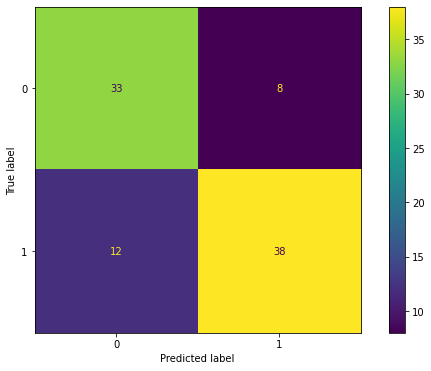

In [276]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [277]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[33  8]
 [12 38]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.77        41
           1       0.83      0.76      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



- Bizim en yakin komsumuz ve sayisini  bulabilmek icn kullandigimiz bir yontem. en iyi kac bunu buluyoruz

# Elbow Method for Choosing Reasonable K Values

In [278]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [279]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

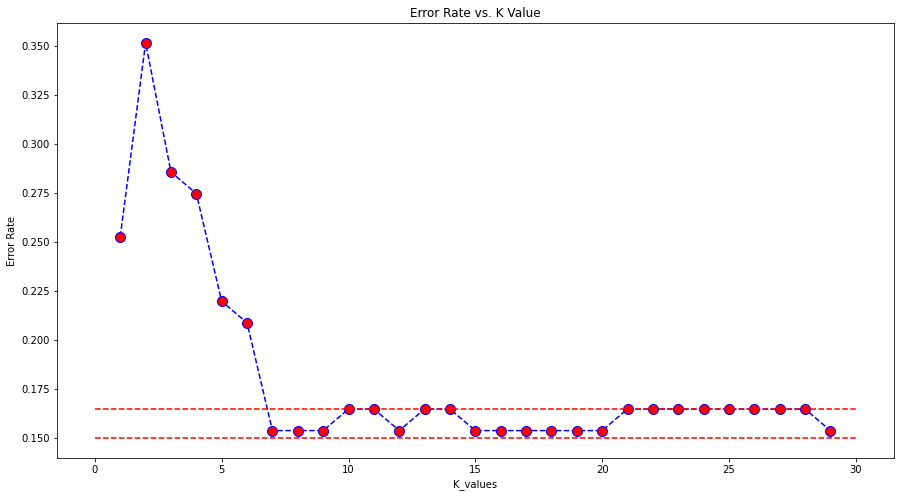

In [280]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.15, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.165, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

- bu grafige gore kacinn opyimal oldugunu yani in hata orani veren bakiyoruz biurda pek cogu ayni veriyor ama makinayi yormamak icin vben en kucuk olan & yi seciyorum

In [281]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=1


[[30 11]
 [12 38]]


              precision    recall  f1-score   support

           0       0.71      0.73      0.72        41
           1       0.78      0.76      0.77        50

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



In [282]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=20


[[36  5]
 [ 9 41]]


              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [283]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=7


[[35  6]
 [ 8 42]]


              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



- optiml

# Cross Validate for Optimal K Value:

In [284]:
from sklearn.model_selection import cross_val_score, cross_validate

In [285]:
model = KNeighborsClassifier(n_neighbors=7) # cross val. için yeni bir model object'i tanımladık

scores = cross_validate(model, scaled_X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.003,0.818,0.833,0.833,0.833
2,0.001,0.002,0.864,1.000,0.750,0.857
3,0.000,0.002,0.810,0.833,0.833,0.833
4,0.000,0.002,0.810,0.833,0.833,0.833
5,0.000,0.002,0.714,0.688,0.917,0.786
6,0.000,0.002,0.810,0.818,0.818,0.818
7,0.000,0.003,0.810,0.769,0.909,0.833
8,0.001,0.003,0.952,0.917,1.000,0.957
9,0.000,0.002,0.762,0.875,0.636,0.737
10,0.000,0.002,0.762,0.800,0.727,0.762


In [286]:
df_scores.mean()[2:]

test_accuracy    0.811
test_precision   0.837
test_recall      0.826
test_f1          0.825
dtype: float64

In [287]:
from sklearn.metrics import make_scorer

In [288]:
scoring = {'precision-0': make_scorer(precision_score,  pos_label=0),# bizim belrledgimiz metriclere gore modelimizin sonuclarina bakiyorum
           'recall-0': make_scorer(recall_score, pos_label =0),
           'f1-0': make_scorer(f1_score, pos_label = 0)}


In [289]:
model = KNeighborsClassifier(n_neighbors=7) 

scores = cross_validate(model, scaled_X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision-0,test_recall-0,test_f1-0
1,0.001,0.003,0.800,0.800,0.800
2,0.000,0.003,0.769,1.000,0.870
3,0.001,0.002,0.778,0.778,0.778
4,0.000,0.003,0.778,0.778,0.778
5,0.000,0.002,0.800,0.444,0.571
6,0.000,0.002,0.800,0.800,0.800
7,0.000,0.002,0.875,0.700,0.778
8,0.000,0.003,1.000,0.900,0.947
9,0.000,0.002,0.692,0.900,0.783
10,0.000,0.002,0.727,0.800,0.762


In [290]:
df_scores.mean()[2:]

test_precision-0   0.802
test_recall-0      0.790
test_f1-0          0.787
dtype: float64

# Gridsearch Method for Choosing Reasonable K Values

In [291]:
from sklearn.model_selection import GridSearchCV

In [292]:
model = KNeighborsClassifier(n_neighbors=7)

scores = cross_validate(model, scaled_X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.003,0.818,0.833,0.833,0.833
2,0.000,0.002,0.864,1.000,0.750,0.857
3,0.000,0.002,0.810,0.833,0.833,0.833
4,0.000,0.003,0.810,0.833,0.833,0.833
5,0.000,0.002,0.714,0.688,0.917,0.786
6,0.001,0.002,0.810,0.818,0.818,0.818
7,0.000,0.002,0.810,0.769,0.909,0.833
8,0.000,0.002,0.952,0.917,1.000,0.957
9,0.000,0.002,0.762,0.875,0.636,0.737
10,0.000,0.002,0.762,0.800,0.727,0.762


In [293]:
df_scores.mean()[2:]

test_accuracy    0.811
test_precision   0.837
test_recall      0.826
test_f1          0.825
dtype: float64

In [294]:
knn_grid = KNeighborsClassifier()

In [295]:
k_values= range(1,30)

In [296]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [297]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [298]:
knn_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [299]:
knn_grid_model.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

In [300]:
print('WITH K=20\n')
eval_metric(knn_grid_model,scaled_X_train, y_train,scaled_X_test, y_test)

WITH K=20

Test_Set
[[34  7]
 [ 9 41]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        41
           1       0.85      0.82      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[79 18]
 [16 99]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        97
           1       0.85      0.86      0.85       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



# ROC/AUC :

In [301]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [302]:
knn_model = KNeighborsClassifier(n_neighbors=20).fit(scaled_X_train, y_train)

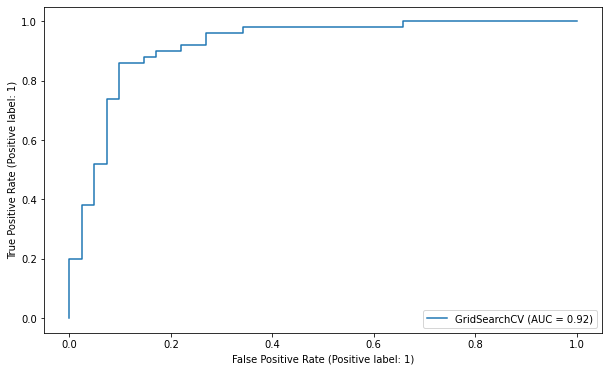

In [303]:
plot_roc_curve(grid_model, scaled_X_test, y_test);  

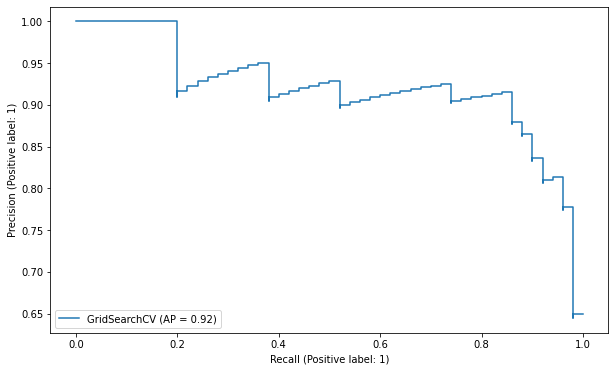

In [304]:
plot_precision_recall_curve(grid_model, scaled_X_test, y_test);

In [305]:
y_pred_proba = log_model.predict_proba(scaled_X_train)  
roc_auc_score(y_train, y_pred_proba[:,1])  

0.9257731958762887

In [306]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [307]:
fp_rate 

array([0.        , 0.        , 0.        , 0.01030928, 0.01030928,
       0.03092784, 0.03092784, 0.04123711, 0.04123711, 0.08247423,
       0.08247423, 0.09278351, 0.09278351, 0.10309278, 0.10309278,
       0.11340206, 0.11340206, 0.12371134, 0.12371134, 0.13402062,
       0.13402062, 0.1443299 , 0.1443299 , 0.16494845, 0.16494845,
       0.19587629, 0.19587629, 0.21649485, 0.21649485, 0.22680412,
       0.22680412, 0.26804124, 0.26804124, 0.27835052, 0.27835052,
       0.28865979, 0.28865979, 0.34020619, 0.34020619, 0.36082474,
       0.36082474, 0.42268041, 0.42268041, 0.45360825, 0.45360825,
       0.48453608, 0.48453608, 0.53608247, 0.53608247, 1.        ])

In [308]:
tp_rate  

array([0.        , 0.00869565, 0.26086957, 0.26086957, 0.48695652,
       0.48695652, 0.63478261, 0.63478261, 0.66956522, 0.66956522,
       0.67826087, 0.67826087, 0.69565217, 0.69565217, 0.79130435,
       0.79130435, 0.80869565, 0.80869565, 0.82608696, 0.82608696,
       0.84347826, 0.84347826, 0.85217391, 0.85217391, 0.87826087,
       0.87826087, 0.88695652, 0.88695652, 0.89565217, 0.89565217,
       0.90434783, 0.90434783, 0.91304348, 0.91304348, 0.92173913,
       0.92173913, 0.93043478, 0.93043478, 0.93913043, 0.93913043,
       0.96521739, 0.96521739, 0.97391304, 0.97391304, 0.9826087 ,
       0.9826087 , 0.99130435, 0.99130435, 1.        , 1.        ])

In [309]:
optimal_idx = np.argmax(tp_rate - fp_rate)          
optimal_threshold = thresholds[optimal_idx]         
optimal_threshold

0.5367459000155533

# Chose best model and make a random prediction 

In [310]:
import pickle

In [311]:
scaler = StandardScaler() #  daha onceki bilgiler karismasin diye yeniden scale ediyorum 

In [312]:
scaler.fit(X)# escale ettigimi komplee egitioyorum bak burda ayirma yoook

StandardScaler()

In [313]:
pickle.dump(scaler, open('scaler_knn_heart.pkl', 'wb'))# burda bir dosya olusturyor
# dosya veriyi nasil sclae edecek onu biliyro
# modeli scale ettik ya ona gore ozgun bir dosya olusturup kaytdediyoruz
# 

In [314]:
X_scaled = scaler.transform(X) # biz modele nasil scale edecegini ogrettik yukarda 
# burdda daverileri scale ediyoruz

In [315]:
final_knn_model = KNeighborsClassifier(n_neighbors=7)# ben 7 oldugunu zaten tesbit ettim 
#atama yapiyorum final model icin en yakin komsu 7 diyom ugramiyor

In [316]:
pickle.dump(final_knn_model, open('knn_final_heart.pkl', 'wb')) # burda dump ile dosya olusturuyor
# wb write ediyor

In [317]:
loaded_scaler = pickle.load(open('scaler_knn_heart.pkl', 'rb'))
# pickle ile olusturdugum modeli bir dosyaya atiyorum
# yukardaki dumplari yukluyorum
# tususnunu kurdugum dosyalari kullanmaya basliyorum
# rb okuyor reead

- looded scaler yeni bir dosya gibi bunu yukluyor.
-bri verinin 

In [318]:
loaded_model = pickle.load(open('knn_final_heart.pkl', 'rb'))
# olusturduklairmi yukluyorum

In [319]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [320]:
X.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,131.624,246.264,149.647,1.040,0.729,0.683,0.165,0.287,0.076,0.149,0.502,0.013,0.327,0.462,0.469,0.059,0.548,0.386
std,9.082,17.538,51.831,22.905,1.161,1.023,0.466,0.372,0.453,0.265,0.356,0.501,0.114,0.470,0.499,0.500,0.237,0.499,0.488
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,120.000,211.000,133.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,130.000,240.000,153.000,0.800,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,61.000,140.000,274.500,166.000,1.600,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000
max,77.000,200.000,564.000,202.000,6.200,4.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [321]:
X.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
298,57,140,241,123,0.200,0,0,0,0,0,0,1,0,1,1,0,0,0,1
63,41,135,203,132,0.000,0,1,1,0,0,0,1,0,0,1,0,1,0,0
144,76,140,197,116,1.100,0,0,0,1,0,0,0,1,0,1,0,0,1,0
283,40,152,223,181,0.000,0,1,0,0,0,0,1,0,0,0,1,0,0,1
179,57,150,276,112,0.600,1,1,0,0,0,0,0,0,1,1,0,1,0,0
193,60,145,282,142,2.800,2,1,0,0,0,0,0,0,1,1,0,0,0,1
4,57,120,354,163,0.600,0,0,0,0,0,0,1,0,1,0,1,0,1,0
207,60,150,258,157,2.600,2,0,0,0,0,0,0,0,0,1,0,0,0,1
131,49,134,271,162,0.000,0,0,1,0,0,0,1,0,0,1,0,0,1,0
215,43,132,341,136,3.000,0,0,0,0,0,1,0,0,1,1,0,0,0,1


In [322]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

# Make a random prediction 

- modelimi disardan gelen veri ile test ediyorum

In [323]:
new_obs = {'age': [15, 20 ,38, 42, 56, 75, 82, 12, 34, 59],
           'trestbps': [120, 131, 136, 140, 120, 150, 175, 172, 192, 100],
           'chol': [130, 148, 154, 196, 306, 448, 211, 346, 460, 500],
           'thalach': [80, 200, 158, 95, 78, 186, 195, 148, 200, 98],
           'oldpeak': [3.3, 4.5, 0.7, 2.4, 3.7, 4.2, 5.7, 0.7, 6.1, 1.0],
           'ca' : [2.0, 1.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0],
           'sex_1': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
           'cp_1': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
           'cp_2': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'cp_3': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
           'fbs_1': [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'restecg_1': [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
           'restecg_2': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'exang_1': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
           'slope_1': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
           'slope_2': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           'thal_1': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
           'thal_2': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
           'thal_3': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}

In [324]:
samples = pd.DataFrame(new_obs)
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [325]:
samples_scaled = loaded_scaler.transform(samples)# yukarda looded diye adlandirmistim 
# benim isteklerime gore disarddan gelen veriye gore scale diyor
samples_scaled

array([[-4.34166707, -0.66386682, -2.24685838, -3.04569256,  1.95003362,
         1.24459328, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
        -0.41763453,  0.9967051 , -0.11566299, -0.69663055,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-3.79022294, -0.03562488, -1.8989997 ,  2.20196803,  2.98526828,
         0.26508221, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394438  , -1.00330579,  8.64580823,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234, -1.10076284,  1.26085034],
       [-1.80502406,  0.24993964, -1.78304681,  0.36528682, -0.29297483,
         3.20361543,  0.68100522, -0.44455422,  1.57567719, -0.28660575,
         2.394438  ,  0.9967051 , -0.11566299,  1.43548113,  1.07902072,
        -0.93914194, -0.25131234,  0.9084609 , -0.79311554],
       [-1.36386876,  0.47839125, -0.97137655, -2.38973499,  1.17360762,
        -0.71442887, -1.46841752,  2.24944438, -0.63464776, -0.28660575,
         2.394

In [326]:
loaded_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=7)

In [327]:
predictions = loaded_model.predict(samples_scaled)# tahmin ettiriyor
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [328]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba_1,pred_proba_0
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.571,0.429
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0,0.143,0.857
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1,0.714,0.286
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1,0.857,0.143
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.143,0.857
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.143,0.857
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.143,0.857
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0,0.429,0.571
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.143,0.857
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0,0.286,0.714
